In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_percentage_error as mape

In [2]:
data_preprocessed = pd.read_csv('Data_Preprocessed.csv')

targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [3]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler().fit(inputs)
inputs_scaled = Scaler.transform(inputs)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

# 1. Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)
lr.fit(x_train, y_train)

LR_y_pred_train = lr.predict(x_train)
print('\nLR Training Accuracy is:',
     '\nR2_Score:', r2_score(y_train, LR_y_pred_train).round(2),
     '\nMSE:', mse(y_train, LR_y_pred_train).round(2),
     '\nMAPE:', mape(y_train, LR_y_pred_train).round(2))

LR_y_pred_test = lr.predict(x_test)
print('\nLR Testing Accuracy is:',
     '\nR2_Score:', r2_score(y_test, LR_y_pred_test).round(2),
     '\nMSE:', mse(y_test, LR_y_pred_test).round(2),
     '\nMAPE:', mape(y_test, LR_y_pred_test).round(2))


LR Training Accuracy is: 
R2_Score: 0.75 
MSE: 0.19 
MAPE: 0.03

LR Testing Accuracy is: 
R2_Score: 0.76 
MSE: 0.2 
MAPE: 0.03


# 2. Extra Trees Regressor

In [6]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse', 
                          max_depth=9, max_features=1.0, max_leaf_nodes=None, 
                          max_samples=None, min_impurity_decrease=0.001, 
                          min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                          n_estimators=250, n_jobs=-1, oob_score=False, random_state=8269, 
                          verbose=0, warm_start=False)
etr.fit(x_train, y_train)

ETR_y_pred_train = etr.predict(x_train)
print('\nETR Training Accuracy is:',
     '\nR2_Score:', r2_score(y_train, ETR_y_pred_train).round(2),
     '\nMSE:', mse(y_train, ETR_y_pred_train).round(2),
     '\nMAPE:', mape(y_train, ETR_y_pred_train).round(2))

ETR_y_pred_test = etr.predict(x_test)
print('\nETR Testing Accuracy is:',
     '\nR2_Score:', r2_score(y_test, ETR_y_pred_test).round(2),
     '\nMSE:', mse(y_test, ETR_y_pred_test).round(2),
     '\nMAPE:', mape(y_test, ETR_y_pred_test).round(2))

/Users/vijaygadre/opt/anaconda3/envs/boost/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(



ETR Training Accuracy is: 
R2_Score: 0.77 
MSE: 0.17 
MAPE: 0.03

ETR Testing Accuracy is: 
R2_Score: 0.76 
MSE: 0.19 
MAPE: 0.03


# Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error', max_depth=7, 
                           max_features='sqrt', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0, 
                           min_samples_leaf=3, min_samples_split=7, min_weight_fraction_leaf=0.0, n_estimators=140, 
                           n_jobs=-1, oob_score=False, random_state=6397, verbose=0, warm_start=False)

rf.fit(x_train, y_train)

RFR_y_pred_train = rf.predict(x_train)
print('\nRF Training Accuracy is:',
     '\nR2_Score:', r2_score(y_train, RFR_y_pred_train).round(2),
     '\nMSE:', mse(y_train, RFR_y_pred_train).round(2),
     '\nMAPE:', mape(y_train, RFR_y_pred_train).round(2))

RFR_y_pred_test = rf.predict(x_test)
print('\nRF Testing Accuracy is:',
     '\nR2_Score:', r2_score(y_test, RFR_y_pred_test).round(2),
     '\nMSE:', mse(y_test, RFR_y_pred_test).round(2),
     '\nMAPE:', mape(y_test, RFR_y_pred_test).round(2))


RF Training Accuracy is: 
R2_Score: 0.76 
MSE: 0.18 
MAPE: 0.03

RF Testing Accuracy is: 
R2_Score: 0.73 
MSE: 0.22 
MAPE: 0.04


# Light Gradient Boosting Machine

In [8]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(bagging_fraction=0.4, bagging_freq=0, boosting_type='gbdt', class_weight=None, 
                     colsample_bytree=1.0, importance_type='split', learning_rate=0.3, 
                     max_depth=-1, min_child_samples=26, min_child_weight=0.001, min_split_gain=0.3, 
                     n_estimators=250, n_jobs=-1, num_leaves=30, objective=None, random_state=6397, 
                     reg_alpha=0.005, reg_lambda=1, silent='warn', subsample=1.0, subsample_for_bin=200000, 
                     subsample_freq=0)

lgbm.fit(x_train, y_train)

LGBM_y_pred_train = lgbm.predict(x_train)
print('\nLGBM Training Accuracy is:',
     '\nR2_Score:', r2_score(y_train, LGBM_y_pred_train).round(2),
     '\nMSE:', mse(y_train, LGBM_y_pred_train).round(2),
     '\nMAPE:', mape(y_train, LGBM_y_pred_train).round(2))

LGBM_y_pred_test = lgbm.predict(x_test)
print('\nLGBM Testing Accuracy is:',
     '\nR2_Score:', r2_score(y_test, LGBM_y_pred_test).round(2),
     '\nMSE:', mse(y_test, LGBM_y_pred_test).round(2),
     '\nMAPE:', mape(y_test, LGBM_y_pred_test).round(2))

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4

LGBM Training Accuracy is: 
R2_Score: 0.83 
MSE: 0.13 
MAPE: 0.03

LGBM Testing Accuracy is: 
R2_Score: 0.8 
MSE: 0.16 
MAPE: 0.03


# Best Model

In [9]:
models = [['LR', 
           r2_score(y_train, LR_y_pred_train).round(2), 
           mse(y_train, LR_y_pred_train).round(2), 
           mape(y_train, LR_y_pred_train).round(2)],
          
          ['ETR', 
           r2_score(y_train, ETR_y_pred_train).round(2),
           mse(y_train, ETR_y_pred_train).round(2),
           mape(y_train, ETR_y_pred_train).round(2)],
         
         ['RFR', 
          r2_score(y_train, RFR_y_pred_train).round(2),
          mse(y_train, RFR_y_pred_train).round(2),
          mape(y_train, RFR_y_pred_train).round(2)],
         
         ['LGBM', 
          r2_score(y_train, LGBM_y_pred_train).round(2),
          mse(y_train, LGBM_y_pred_train).round(2),
          mape(y_train, LGBM_y_pred_train).round(2)]
         ]

models = pd.DataFrame(data=models, columns=['Model', 'R2', 'MSE', 'MAPE'])
models.sort_values(by='R2', ascending=False)

,Model,R2,MSE,MAPE
3,LGBM,0.83,0.13,0.03
1,ETR,0.77,0.17,0.03
2,RFR,0.76,0.18,0.03
0,LR,0.75,0.19,0.03


# Plot and Compare Targets and its Prediction

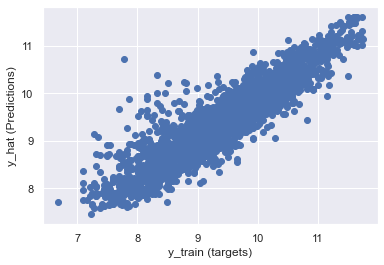

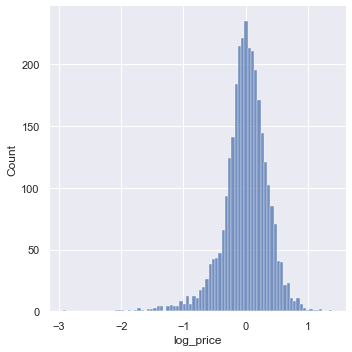

In [10]:
y_hat = lgbm.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlabel('y_train (targets)')
plt.ylabel('y_hat (Predictions)')

residual = y_train - y_hat
sns.displot(residual)

# Testing

### Reset the index

In [11]:
y_test = y_test.reset_index(drop=True)

### Predicting the test set

In [12]:
y_hat_test = lgbm.predict(x_test)

### Plot and Compare targets and its prediction

Text(0, 0.5, 'y_hat_test (Prediction)')

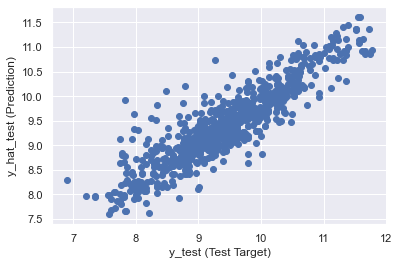

In [13]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('y_test (Test Target)')
plt.ylabel('y_hat_test (Prediction)')

### Plot and Compare using Residuals

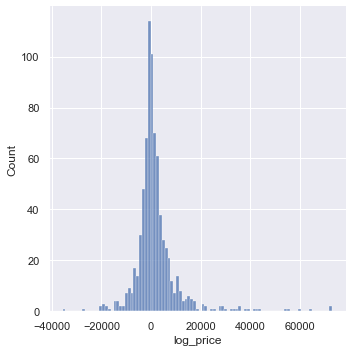

In [14]:
residual_test = np.exp(y_test) - np.exp(y_hat_test)
sns.displot(residual_test)

### Prediction Dataset Performance

In [15]:
prediction = pd.DataFrame(data=np.exp(y_hat_test),
                         columns=['y_hat_test (Prediction)'])
prediction['y_test (targets)'] = np.exp(y_test)
prediction['Residual'] = residual_test
prediction['Residual Percentage'] = np.absolute(prediction['Residual'] / prediction['y_test (targets)'] * 100).round(3)
prediction

,y_hat_test (Prediction),y_test (targets),Residual,Residual Percentage
0,21804.633502,24500.0,2695.366498,11.001
1,5949.835169,8900.0,2950.164831,33.148
2,45516.063298,69900.0,24383.936702,34.884
3,4779.289141,7000.0,2220.710859,31.724
4,6437.255128,5400.0,-1037.255128,19.208
...,...,...,...,...
769,36033.068817,39500.0,3466.931183,8.777
770,8193.541503,8800.0,606.458497,6.892
771,7172.924916,12500.0,5327.075084,42.617
772,57332.460648,65000.0,7667.539352,11.796


In [16]:
prediction.describe(include='all')

,y_hat_test (Prediction),y_test (targets),Residual,Residual Percentage
count,774.000000,774.000000,774.000000,774.000000
mean,16928.389252,18841.112041,1912.722789,32.996320
std,15718.921314,20314.008413,9432.034933,50.864523
min,1989.384993,999.000000,-35713.859367,0.028000
25%,7629.234745,6999.000000,-1727.418507,9.923250
50%,11415.920502,11931.000000,202.009790,20.915000
75%,19805.960055,22375.000000,3586.069375,37.688750
max,110732.885707,129222.000000,73106.724937,716.365000
